In [39]:
# Set-Ups
import csv
import math
import random
import string
import numpy as np
import pandas as pd 
import pylab as plt

# Load the data
df = pd.read_csv("CHD_preprocessed.csv", sep=",")
#df = pd.read_csv("framingham.csv", sep=",")
## data split
from sklearn.model_selection import train_test_split

df_X = df[df.columns[df.columns != 'TenYearCHD']].copy()
df_y = df['TenYearCHD'].copy()

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test))

Number of training instances:  3306 
Number of test instances:  827


Baseline model 1: Naive DT
Test acc: 0.776

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=None)
dt_model = dt.fit(X_train,y_train)
print('Decision Tree accuracy for training set: %f' % dt_model.score(X_train, y_train))
print('Decision Tree accuracy for test set: %f' % dt_model.score(X_test, y_test))


Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.776300


Baseline Model 2: Random Forest
Test acc: 0.850060

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=69, max_depth=None)
clf.fit(X_train,y_train)

print('Random forest accuracy for training set: %f' % clf.score(X_train, y_train))
print('Random forest accuracy for test set: %f' % clf.score(X_test, y_test))

Random forest accuracy for training set: 0.999698
Random forest accuracy for test set: 0.850060


In [74]:
# Plot for getting best n_estimators
k = 300
rf_acc_history = []

for i in range(k):
    clf_test = RandomForestClassifier(n_estimators=i+1, max_depth=None)
    clf_test.fit(X_train,y_train)
    rf_acc_history.append(clf_test.score(X_test, y_test))

KeyboardInterrupt: 

68


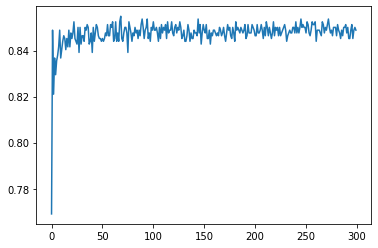

In [73]:
plt.plot(rf_acc_history)
max_index = rf_acc_history.index(max(rf_acc_history))
print(max_index) #68

Baseline Model 3: GBDT with XGBoosting
Test acc: 0.852479

In [77]:
# XGBoosting Set-Ups
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=2, seed=4212)
xg_cl.fit(X_train,y_train)

print('GBDT accuracy for training set: %f' % xg_cl.score(X_train, y_train))
print('GBDT forest accuracy for test set: %f' % xg_cl.score(X_test, y_test))

[14:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GBDT accuracy for training set: 0.869631
GBDT forest accuracy for test set: 0.852479


C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas

In [68]:
%%capture  
# Plot for getting best n_estimators
k = 100
gbdt_acc_history = []

for i in range(k):
    xg_cl_test = xgb.XGBClassifier(objective='binary:logistic', n_estimators=i, seed=4212)
    xg_cl_test.fit(X_train,y_train)
    gbdt_acc_history.append(xg_cl_test.score(X_test, y_test))

2


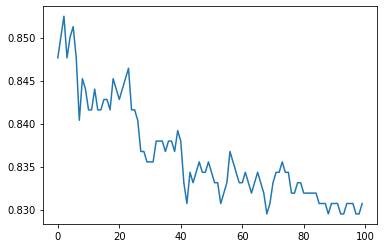

In [69]:
import pylab as plt
plt.plot(gbdt_acc_history)
max_index = gbdt_acc_history.index(max(gbdt_acc_history))
print(max_index) #2

Baseline Model 4: lightGBM
Test acc: 0.8513

In [65]:
# !pip install lightgbm
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(learning_rate=0.0167,max_depth=-5,random_state=4212)
lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

print('LightGBM accuracy for training set: {:.4f}'.format(lgbm.score(X_train,y_train)))
print('LightGBM accuracy for test set: {:.4f}'.format(lgbm.score(X_test,y_test)))

[20]	training's binary_logloss: 0.387453	valid_0's binary_logloss: 0.407851
[40]	training's binary_logloss: 0.36284	valid_0's binary_logloss: 0.39849
[60]	training's binary_logloss: 0.344285	valid_0's binary_logloss: 0.39414
[80]	training's binary_logloss: 0.328917	valid_0's binary_logloss: 0.392237
[100]	training's binary_logloss: 0.315896	valid_0's binary_logloss: 0.392268
LightGBM accuracy for training set: 0.8642
LightGBM accuracy for test set: 0.8513


C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [59]:
%%capture  
# Find better learning rate for light GBM
#lr = [0.0001,0.001,0.005,0.01,0.05,0.1]
k = 200
lgb_acc_history = []
for i in range(k):
    lgbm_test = lgb.LGBMClassifier(learning_rate=i*0.0001+0.0001,max_depth=-5,random_state=4212)
    lgbm_test.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')
    lgb_acc_history.append(lgbm_test.score(X_test,y_test))
       

166


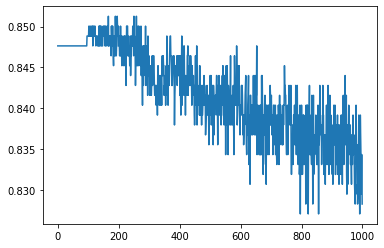

In [63]:
plt.plot(lgb_acc_history) 
max_index = lgb_acc_history.index(max(lgb_acc_history))
print(max_index) # 166